In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

In [2]:
np.version.version

'1.19.5'

In [3]:
df_main = pd.read_csv('covidvaccine.csv')
print(df_main.shape)
df_main.head(10)

(161251, 13)


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,03-08-2020 13:39,3.0,27.0,918.0,False,18-08-2020 12:44,The Multi-system Inflammatory Syndrome-Childre...,"['COVID19', 'COVID19India']",Twitter for Android,False
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,False,18-08-2020 12:34,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False
8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,False,18-08-2020 12:15,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False
9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282.0,96.0,788.0,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False


In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161251 entries, 0 to 161250
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         161247 non-null  object 
 1   user_location     128420 non-null  object 
 2   user_description  152109 non-null  object 
 3   user_created      161247 non-null  object 
 4   user_followers    161246 non-null  float64
 5   user_friends      161246 non-null  object 
 6   user_favourites   161246 non-null  object 
 7   user_verified     161246 non-null  object 
 8   date              161245 non-null  object 
 9   text              161246 non-null  object 
 10  hashtags          109731 non-null  object 
 11  source            161098 non-null  object 
 12  is_retweet        161241 non-null  object 
dtypes: float64(1), object(12)
memory usage: 16.0+ MB


In [5]:
df_main['text'] = df_main['text'].astype(str)

In [6]:
df_main['text'][14]

'The whole narrative on the #CovidVaccine has gone deathly silent! #ChinaVirus #COVID19India'

In [7]:
df = pd.read_csv('covidvaccine.csv')
df['text'] = df['text'].astype(str)

C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
from bs4 import BeautifulSoup

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
len(test_result)

161251

In [9]:
df['text'] = test_result

In [10]:
print(df.shape)
df.head(10)

(161251, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,australia to manufacture covid vaccine and giv...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,coronavirusvaccine coronavaccine covidvaccine ...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,deaths due to covid in affected countries read...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,subhashree stay safe di da,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,this is what passes for leadership in our coun...,NaN,Twitter Web App,False
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,03-08-2020 13:39,3.0,27.0,918.0,False,18-08-2020 12:44,the multi system inflammatory syndrome childre...,"['COVID19', 'COVID19India']",Twitter for Android,False
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,False,18-08-2020 12:34,,NaN,Twitter for Android,False
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,False,18-08-2020 12:30,well let s qualify that would anyone of any pa...,['CovidVaccine'],Twitter for iPhone,False
8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,False,18-08-2020 12:15,most countries without the ability to make vac...,['Vaccines'],Hootsuite Inc.,False
9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282.0,96.0,788.0,False,18-08-2020 11:57,dna zooms up charts in st week hear vaccines e...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False


In [11]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Himanshu
[nltk_data]     Beniwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))

print(df.shape)
df.head(10)

[nltk_data] Downloading package wordnet to C:\Users\Himanshu
[nltk_data]     Beniwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
(161251, 17)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,australia manufacture covid vaccine give citiz...,['CovidVaccine'],Twitter Web App,False,"[australia, manufacture, covid, vaccine, give,...","[australia, manufacture, covid, vaccine, give,...","[australia, manufactur, covid, vaccin, give, c...","[australia, manufacture, covid, vaccine, give,..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,coronavirusvaccine coronavaccine covidvaccine ...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccin, coronavaccin, covidvaccin,...","[coronavirusvaccine, coronavaccine, covidvacci..."
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,deaths covid affected countries read more piryani,NaN,Twitter Web App,False,"[deaths, covid, affected, countries, read, mor...","[deaths, covid, affected, countries, read, pir...","[death, covid, affect, countri, read, piryani]","[death, covid, affected, country, read, piryani]"
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,subhashree stay safe,NaN,Twitter for Android,False,"[subhashree, stay, safe]","[subhashree, stay, safe]","[subhashre, stay, safe]","[subhashree, stay, safe]"
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,this what passes leadership country voucher so...,NaN,Twitter Web App,False,"[this, what, passes, leadership, country, vouc...","[passes, leadership, country, voucher, something]","[pass, leadership, countri, voucher, someth]","[pass, leadership, country, voucher, something]"
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,03-08-2020 13:39,3.0,27.0,918.0,False,18-08-2020 12:44,multi system inflammatory syndrome children co...,"['COVID19', 'COVID19India']",Twitter for Android,False,"[multi, system, inflammatory, syndrome, childr...","[multi, system, inflammatory, syndrome, childr...","[multi, system, inflammatori, syndrom, childre...","[multi, system, inflammatory, syndrome, child,..."
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,False,18-08-2020 12:34,,NaN,Twitter for Android,False,[],[],[],[]
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,False,18-08-2020 12:30,well qualify that would anyone party vaccine r...,['CovidVaccine'],Twitter for iPhone,False,"[well, qualify, that, would, anyone, party, va...","[well, qualify, would, anyone, party, vaccine,...","[well, qualifi, would, anyon, parti, vaccin, r...","[well, qualify, would, anyone, party, vaccine,..."
8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",17-01-2009 21:10,19091.0,20986.0,128119.0,False,18-08-2020 12:15,most countries without ability make vaccines l...,['Vaccines'],Hootsuite Inc.,False,"[most, countries, without, ability, make, vacc...","[countries, without, ability, make, vaccines, ...","[countri, without, abil, make, vaccin, local, ...","[country, without, ability, make, vaccine, loc..."
9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282.0,96.0,788.0,False,18-08-2020 11:57,zooms charts week hear vaccines episode pandem...,"['DNA', 'vaccines', 'pandemic', 'COVID19'

In [13]:
print(df_main['text'][147])
print(df['text'][147])
print(df['Tweet_tokenized'][147])
print(df['Tweet_nonstop'][147])
print(df['Tweet_stemmed'][147])
print(df['Tweet_lemmatized'][147])

To change the course of the #COVID19 pandemic, @FujifilmDiosyn have expanded their partnership with @Novavax to man… https://t.co/ieZfTtmVpn
change course covid pandemic have expanded their partnership with
['change', 'course', 'covid', 'pandemic', 'have', 'expanded', 'their', 'partnership', 'with']
['change', 'course', 'covid', 'pandemic', 'expanded', 'partnership']
['chang', 'cours', 'covid', 'pandem', 'expand', 'partnership']
['change', 'course', 'covid', 'pandemic', 'expanded', 'partnership']


In [14]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\Himanshu
[nltk_data]     Beniwal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
vds = SentimentIntensityAnalyzer()
txt = df['text'][147]
print(txt)
vds.polarity_scores(txt)

change course covid pandemic have expanded their partnership with


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

 1    72424
 0    59973
-1    28854
Name: sentiment, dtype: int64  1    0.449138
 0    0.371923
-1    0.178938
Name: sentiment, dtype: float64


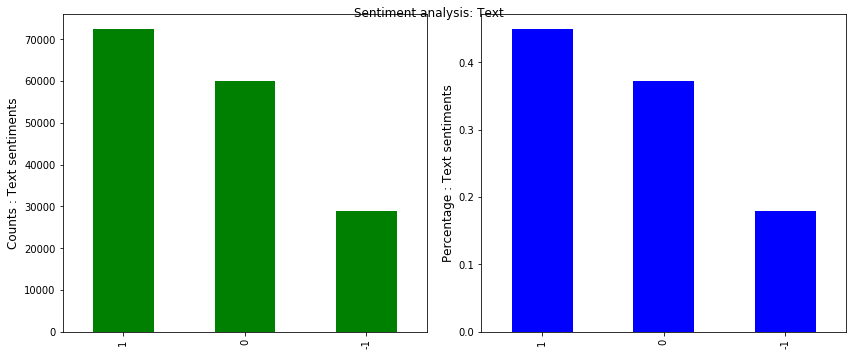

In [16]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return int(1)
    elif sia.polarity_scores(post)["compound"] < 0:
        return int(-1)
    else:
        return int(0) 
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)
    print(counts, percent)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'Text')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161251 entries, 0 to 161250
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         161247 non-null  object 
 1   user_location     128420 non-null  object 
 2   user_description  152109 non-null  object 
 3   user_created      161247 non-null  object 
 4   user_followers    161246 non-null  float64
 5   user_friends      161246 non-null  object 
 6   user_favourites   161246 non-null  object 
 7   user_verified     161246 non-null  object 
 8   date              161245 non-null  object 
 9   text              161251 non-null  object 
 10  hashtags          109731 non-null  object 
 11  source            161098 non-null  object 
 12  is_retweet        161241 non-null  object 
 13  Tweet_tokenized   161251 non-null  object 
 14  Tweet_nonstop     161251 non-null  object 
 15  Tweet_stemmed     161251 non-null  object 
 16  Tweet_lemmatized  16

In [18]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,sentiment
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,australia manufacture covid vaccine give citiz...,['CovidVaccine'],Twitter Web App,False,"[australia, manufacture, covid, vaccine, give,...","[australia, manufacture, covid, vaccine, give,...","[australia, manufactur, covid, vaccin, give, c...","[australia, manufacture, covid, vaccine, give,...",1
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,coronavirusvaccine coronavaccine covidvaccine ...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccin, coronavaccin, covidvaccin,...","[coronavirusvaccine, coronavaccine, covidvacci...",1
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,deaths covid affected countries read more piryani,NaN,Twitter Web App,False,"[deaths, covid, affected, countries, read, mor...","[deaths, covid, affected, countries, read, pir...","[death, covid, affect, countri, read, piryani]","[death, covid, affected, country, read, piryani]",-1
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,subhashree stay safe,NaN,Twitter for Android,False,"[subhashree, stay, safe]","[subhashree, stay, safe]","[subhashre, stay, safe]","[subhashree, stay, safe]",1
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,this what passes leadership country voucher so...,NaN,Twitter Web App,False,"[this, what, passes, leadership, country, vouc...","[passes, leadership, country, voucher, something]","[pass, leadership, countri, voucher, someth]","[pass, leadership, country, voucher, something]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161246,Multivalent Dirk Haussecker,RNA World,Biotech stock addict. Trained in RNAi. Love gr...,2011-11-10 12:00:58,11708.0,371,9176,False,2021-03-11 22:30:23,abus totally missing action nothing mrna covid...,"['covidvaccine', 'sarscov2']",Twitter Web App,False,"[abus, totally, missing, action, nothing, mrna...","[abus, totally, missing, action, nothing, mrna...","[abu, total, miss, action, noth, mrna, covidva...","[abus, totally, missing, action, nothing, mrna...",-1
161247,Craig Brown 🏳️‍🌈,"Melbourne, Victoria",writer. dad. husband. exvangelical. type 1. le...,2012-06-20 16:47:27,397.0,838,9927,False,2021-03-11 22:30:05,race says already vaccinated vaccine auspol co...,"['vaccine', 'auspol', 'CovidVaccine', 'ScottyF...",Twitter for iPhone,False,"[race, says, already, vaccinated, vaccine, aus...","[race, says, already, vaccinated, vaccine, aus...","[race, say, alreadi, vaccin, vaccin, auspol, c...","[race, say, already, vaccinated, vaccine, ausp...",0
161248,Faith in New York,"New York, USA",Building power in New York faith institutions ...,2013-06-04 21:34:33,3122.0,2569,6663,False,2021-03-11 22:29:58,covid vaccine live bronx harlem area eligible ...,"['Bronx', 'Harlem']",Twitter for iPhone,False,"[covid, vaccine, live, bronx, harlem, area, el...","[covid, vaccine, live, bronx, harlem, area, el...","[covid, vaccin, live, bronx, harlem, area, eli...","[covid, vaccine, live, bronx, harlem, area, el...",0
161249,Openly Black & Queer & Adrian 🎵🎬⚖️,In My Bag,CashApp $inga4hire 💰 // #MeToo Fellow //Spelma...,2009-09-16 15:33:00,460.0,523,30867,False,2021-03-11 22:29:56,doctor like schedule your covidvaccine,['CovidVaccine'],Twitter for Android,False,"[doctor, like, schedule, your, covidvaccine]"

In [19]:
df['text_len'] = df['Tweet_lemmatized'].apply(lambda x: len(x))
df['text_len_full'] = df['text'].apply(lambda x: len(x))

In [20]:
max(df['text_len_full'])

127

In [21]:
X_main=df.text.values
y=df.sentiment.values

## LSTM

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

max_len = 18
tok = Tokenizer(num_words=128)
tok.fit_on_texts(X_main)
sequences = tok.texts_to_sequences(X_main)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.1, random_state=2)

RuntimeError: Physical devices cannot be modified after being initialized

In [23]:
sequences_matrix.shape

(161251, 18)

In [24]:

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(145125, 18)
(16126, 18)
(145125,)
(16126,)


In [25]:
def tensorflow_based_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(128,18,input_length=max_len)(inputs) 
    layer = LSTM(32)(layer) 
    layer = Dense(64)(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.1)(layer) 
    layer = Dense(1)(layer) 
    layer = Activation('softmax')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 

In [26]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [27]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=30, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/30


UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[model/lstm/StatefulPartitionedCall]] [Op:__inference_train_function_3101]

Function call stack:
train_function -> train_function -> train_function


In [ ]:
accr1 = model.evaluate(X_test,Y_test)

# SVM

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn
from sklearn import metrics
# Create feature vectors
X_main=df.text.values
y=df.sentiment.values
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
print("Starting training...")
t0 = time.time()
classifier_linear.fit(train_vectors, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 3561.362895s; Prediction time: 65.813573s
             precision    recall  f1-score   support

         -1       0.95      0.88      0.92      3221
          0       0.96      0.99      0.98      6929
          1       0.97      0.97      0.97      8200

avg / total       0.96      0.96      0.96     18350

0.9631062670299727


In [44]:
from sklearn.pipeline import Pipeline
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
svmClf = SVC(kernel = 'linear')
X_main=df.text.values
y=df.sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
pipe = Pipeline([('vect', CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,1))),
                 ('tfidf', TfidfTransformer()),
                 ('model', svmClf)])
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')
print("Starting training...")
t0 = time.time()
pipe.fit(X_train, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = pipe.predict(X_test)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 5060.583648s; Prediction time: 79.473106s
             precision    recall  f1-score   support

         -1       0.95      0.88      0.91      3221
          0       0.96      0.99      0.97      6929
          1       0.97      0.97      0.97      8200

avg / total       0.96      0.96      0.96     18350

0.9615258855585831


In [45]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(Y_test, prediction_linear))

0.9615258855585831


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn
from sklearn import metrics
# Create feature vectors
X_main=df.text.values
y=df.sentiment.values
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='rbf')
print("Starting training...")
t0 = time.time()
classifier_linear.fit(train_vectors, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 4160.437060s; Prediction time: 239.763114s
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      3221
          0       0.00      0.00      0.00      6929
          1       0.45      1.00      0.62      8200

avg / total       0.20      0.45      0.28     18350

0.44686648501362397


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn
from sklearn import metrics
# Create feature vectors
X_main=df.text.values
y=df.sentiment.values
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='poly')
print("Starting training...")
t0 = time.time()
classifier_linear.fit(train_vectors, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 2968.295659s; Prediction time: 218.538737s
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      3221
          0       0.00      0.00      0.00      6929
          1       0.45      1.00      0.62      8200

avg / total       0.20      0.45      0.28     18350

0.44686648501362397


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn
from sklearn import metrics
# Create feature vectors
X_main=df.text.values
y=df.sentiment.values
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
X_train, X_test, Y_train, Y_test = train_test_split(X_main, y, test_size=0.1, random_state=27)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='sigmoid')
print("Starting training...")
t0 = time.time()
classifier_linear.fit(train_vectors, Y_train)
t1 = time.time()
print("Training Finished, now begining the predictions... 😊")
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
print("Prediction completed. 😎")
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(Y_test, prediction_linear))
print(accuracy_score(Y_test, prediction_linear))

Starting training...
Training Finished, now begining the predictions... 😊
Prediction completed. 😎
Training time: 3795.076658s; Prediction time: 223.502507s
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      3221
          0       0.00      0.00      0.00      6929
          1       0.45      1.00      0.62      8200

avg / total       0.20      0.45      0.28     18350

0.44686648501362397


C:\Users\Himanshu Beniwal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
